In [1]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_excel('datasets/acath.xlsx')
df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,0,73,132,268.0,1,1.0
1,0,68,85,120.0,1,1.0
2,0,54,45,NaN,1,0.0
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0


## Validamos datos

In [36]:
dur0 = df[df["cad.dur"] == 0]
print(f"filas con duracion 0: {len(dur0)}")
dur0.isna().sum()

filas con duracion 0: 123


sex          0
age          0
cad.dur      0
choleste    95
sigdz        0
tvdlm        0
dtype: int64

Hay 123 filas con duracion 0, ademas la mayoria de estas filas tiene algun tipo de dato faltante. Duracion 0 parece un valor extraño pero hay valores con duracion 0 tanto con enfermedad coronaria y sin, por lo que no es un valor exclusivo de los que no presentan sintomas o algo asi. Teniendo en cuenta que hay NaNs en el dataset, supongo que es un valor puesto adrede, ademas aunque no lo fuera son pocos datos comparados al resto del dataset asi que no creo que afecte mucho.

## Chequeamos datos faltantes

In [3]:
df.isna().sum()

sex            0
age            0
cad.dur        0
choleste    1246
sigdz          0
tvdlm          3
dtype: int64

### Estrategia para reemplazar datos faltantes

La mayoria de los datos faltantes se encuentran en colesterol, asi que obtenemos la mediana de colesterol de la gente que tenga el mismo rango de edad, mismo sexo y mismo sigdz

#### 1. Separamos edad en rangos

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

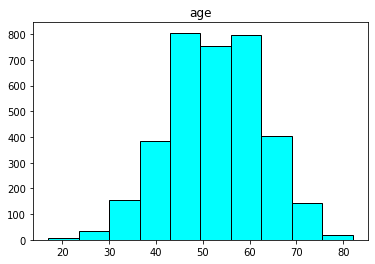

In [4]:
df.hist(column='age', grid=False, color='cyan', ec='black')

In [5]:
print(pd.qcut(df['age'], 3))

0       (57.0, 82.0]
1       (57.0, 82.0]
2       (48.0, 57.0]
3       (57.0, 82.0]
4       (48.0, 57.0]
            ...     
3499    (57.0, 82.0]
3500    (57.0, 82.0]
3501    (57.0, 82.0]
3502    (57.0, 82.0]
3503    (57.0, 82.0]
Name: age, Length: 3504, dtype: category
Categories (3, interval[float64, right]): [(16.999, 48.0] < (48.0, 57.0] < (57.0, 82.0]]


In [6]:
age = df['age']
cat1 = df[age < 48]
cat2 = df[(age >= 48) & (age < 56)]
cat3 = df[(age >= 56)]

print(f"Cantidad de elementos por categoria")
print(f"Categoria 1: {len(cat1)}")
print(f"Categoria 2: {len(cat2)}")
print(f"Categoria 3: {len(cat3)}")

Cantidad de elementos por categoria
Categoria 1: 1109
Categoria 2: 1034
Categoria 3: 1361


#### 2. Reemplazamos valores de colesterol

In [7]:
data = df.copy()
for i, row in data.iterrows():
    if not np.isnan(row["choleste"]):
        continue
    cat = row["age"]
    sex = (df["sex"] == row["sex"])
    sick = (df["sigdz"] == row["sigdz"])
    
    if cat < 48:
        age = df["age"] < 48
    elif cat >= 48 and cat < 56:
        age = (df["age"] >= 48) & (df["age"] < 56)
    else:
        age = df["age"] >= 56
    chol = round(df[sex & age & sick].median()["choleste"])
    data.at[i, "choleste"] = chol

In [8]:
data.isna().sum()

sex         0
age         0
cad.dur     0
choleste    0
sigdz       0
tvdlm       3
dtype: int64

Como `tvdlm` solo tiene 3 NaN los descartamos ya que son poquitos

In [9]:
data = data.dropna()

In [10]:
data.isna().sum()

sex         0
age         0
cad.dur     0
choleste    0
sigdz       0
tvdlm       0
dtype: int64

In [11]:
data.to_csv('./datasets/clean_acath.csv', index=False)